**|| SHREE GANESHAY NAMAH ||**

In [ ]:
print("SHREE GANESHAY NAMAH")

SHREE GANESHAY NAMAH


In [ ]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# #
# !unzip helmet_dataset.zip -d helmet_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import xml.etree.ElementTree as ET

input_dir = "/content/drive/MyDrive/Project/DataSet/helmet_data/annotations"  # where .xml files are
output_dir = "/content/drive/MyDrive/Project/Dataset/helmet_data/yolo_labels"

os.makedirs(output_dir, exist_ok=True)

# Adjusted to match your dataset
classes = ["Without Helmet", "With Helmet"]

def convert_xml_to_yolo(xml_file, output_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    img_w = int(root.find("size/width").text)
    img_h = int(root.find("size/height").text)

    with open(output_file, "w") as f:
        for obj in root.findall("object"):
            cls = obj.find("name").text.strip()  # e.g., "With Helmet"
            if cls not in classes:
                print(f"Skipping unknown class: {cls}")
                continue
            cls_id = classes.index(cls)

            xmlbox = obj.find("bndbox")
            xmin = int(xmlbox.find("xmin").text)
            ymin = int(xmlbox.find("ymin").text)
            xmax = int(xmlbox.find("xmax").text)
            ymax = int(xmlbox.find("ymax").text)

            # Convert to YOLO format (normalized)
            x_center = (xmin + xmax) / 2.0 / img_w
            y_center = (ymin + ymax) / 2.0 / img_h
            w = (xmax - xmin) / img_w
            h = (ymax - ymin) / img_h

            f.write(f"{cls_id} {x_center} {y_center} {w} {h}\n")

# Convert all XMLs
for file in os.listdir(input_dir):
    if file.endswith(".xml"):
        xml_file = os.path.join(input_dir, file)
        txt_file = os.path.join(output_dir, file.replace(".xml", ".txt"))
        convert_xml_to_yolo(xml_file, txt_file)

print("✅ Conversion complete! YOLO labels saved in:", output_dir)


✅ Conversion complete! YOLO labels saved in: /content/drive/MyDrive/Project/Dataset/helmet_data/yolo_labels


In [ ]:
import os, random, shutil

image_dir = "/content/drive/MyDrive/Project/DataSet/helmet_data/images"
label_dir = "/content/drive/MyDrive/Project/Dataset/helmet_data/yolo_labels"
output_path = "/content/drive/MyDrive/Project/Dataset/helmet_data"

# Make train/val folders
for folder in ["train", "val"]:
    os.makedirs(os.path.join(output_path, "images", folder), exist_ok=True)
    os.makedirs(os.path.join(output_path, "labels", folder), exist_ok=True)

# Split
images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg','.png'))]
random.shuffle(images)
train_size = int(0.8 * len(images))

train_imgs = images[:train_size]
val_imgs = images[train_size:]

def move_files(img_list, split):
    for img in img_list:
        base = os.path.splitext(img)[0]
        label_file = base + ".txt"

        # move image
        shutil.copy(os.path.join(image_dir, img),
                    os.path.join(output_path, "images", split, img))

        # move label
        shutil.copy(os.path.join(label_dir, label_file),
                    os.path.join(output_path, "labels", split, label_file))

move_files(train_imgs, "train")
move_files(val_imgs, "val")

print("✅ Dataset organized into train/val splits!")


✅ Dataset organized into train/val splits!


# Training of model


In [ ]:
# Install ultralytics if not already
!pip install ultralytics
from google.colab import drive
from ultralytics import YOLO
# 1. Mount Google Drive (if not already done)
drive.mount('/content/drive')


# Load pre-trained YOLOv8s (small & fast)
model = YOLO("yolov8s.pt")

# Train on your dataset
model.train(
    data="/content/drive/MyDrive/Project/Dataset/helmet_data/data.yaml",  # path to data.yaml
    epochs=50,           # you can increase later
    imgsz=640,           # image size
    batch=16,            # adjust depending on GPU memory
    name="helmet_detection"  # name for the run folder
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Project/Dataset/helmet_data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scal

KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

# Load your saved YOLO model
model = YOLO("/content/runs/detect/helmet_detection/weights/best.pt")   # <-- change to your model path

# Evaluate model accuracy
results = model.val(
    data="/content/drive/MyDrive/Project/Dataset/helmet_data/data.yaml",     # <-- write your dataset yaml path
    imgsz=640
)

# Print metrics
print("Precision:", results.box.mp)
print("Recall:", results.box.mr)
print("mAP50-95:", results.box.map50)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.9 ms, read: 79.7±68.5 MB/s, size: 341.6 KB)
val: Scanning /content/drive/MyDrive/Project/Dataset/helmet_data/labels/val.cache... 646 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 646/646 612.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 2.8it/s 14.6s
                   all        646       1202      0.933      0.968      0.983      0.765
        Without Helmet        225        404      0.926      0.959       0.98      0.733
           With Helmet        463        798       0.94      0.976      0.986      0.797
Speed: 1.3ms preprocess, 6.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val8
Precision: 0.9331783993227425
Recall: 0.9676014335512422
mAP50-95: 0

In [ ]:
import shutil
import os
from google.colab import drive

# 1. Mount Google Drive (if not already done)
drive.mount('/content/drive')
# 1. Define the source path of the best model weights
# Replace 'helmet_detection_v33' if you change the 'name' argument in model.train()
source_path = '/content/runs/detect/helmet_detection2/weights/best.pt'

# 2. Define the destination path in your Google Drive
# It's good practice to create a dedicated folder for models.
destination_dir = '/content/drive/MyDrive/Project/Trained_Models'
destination_path = os.path.join(destination_dir, 'best_helmet_model_YOLOv8n.pt')

# 3. Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# 4. Copy the file
shutil.copy(source_path, destination_path)

print(f"✅ Trained model successfully saved to: {destination_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Trained model successfully saved to: /content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt


In [ ]:
from ultralytics import YOLO
from google.colab import drive

# 1. Mount Google Drive (if not already done)
drive.mount('/content/drive')

# 2. Define the path to your saved model file in Google Drive
model_path = '/content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt'

# 3. Load the saved model (This is fast!)
# The 'model' variable is now your trained model instance.
model = YOLO(model_path)

print(f"✅ Successfully loaded trained model from: {model_path}")

# Now you can proceed directly to prediction or validation:
# results = model.predict(source="/path/to/image.jpg", conf=0.5, save=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Successfully loaded trained model from: /content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt


In [ ]:
# Run prediction and save results
results = model.predict(
    source="/content/drive/MyDrive/Project/Dataset/helmet_data/images/val/BikesHelmets763.png",
    conf=0.5,
    save=True
)


image 1/1 /content/drive/MyDrive/Project/Dataset/helmet_data/images/val/BikesHelmets760.png: 448x640 4 With Helmets, 48.1ms
Speed: 2.0ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


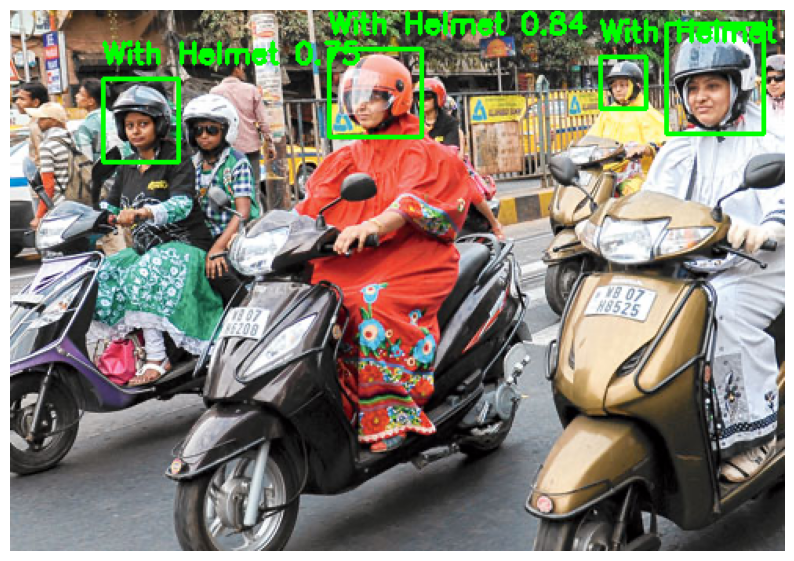

In [ ]:
import cv2
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt")

# Run prediction on a single image
results = model.predict("/content/drive/MyDrive/Project/Dataset/helmet_data/images/val/BikesHelmets760.png", conf=0.5)

# Load image
img_path = results[0].orig_img
img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)

# Loop through detections
for box in results[0].boxes:  # each box object
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box coordinates
    cls = int(box.cls[0])                    # class index
    conf = float(box.conf[0])                # confidence

    # Choose color based on class
    if cls == 0:      # Without Helmet
        color = (255, 0, 0)  # Red in BGR
    else:             # With Helmet
        color = (0, 255, 0)  # Green in BGR

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Put label text
    label = f"{results[0].names[cls]} {conf:.2f}"
    cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Show image using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()



image 1/1 /content/drive/MyDrive/Project/Dataset/helmet_data/images/val/BikesHelmets699.png: 480x640 1 With Helmet, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


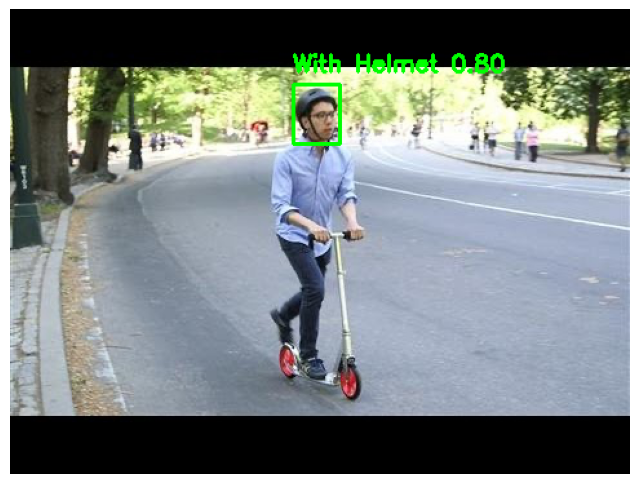

In [ ]:
import cv2
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Path to your images folder
images_folder = "/content/drive/MyDrive/Project/Dataset/helmet_data/images/val"

# Randomly select 5 images
all_images = [os.path.join(images_folder, f) for f in os.listdir(images_folder)
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
selected_images = random.sample(all_images, 1)

# Load trained model
model = YOLO("/content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt")

# Loop through selected images
for img_path in selected_images:
    # Run prediction
    results = model.predict(img_path, conf=0.5)

    # Load image
    img = cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB)

    # Loop through detections
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])

        # Choose color based on class
        color = (255, 0, 0) if cls == 0 else (0, 255, 0)

        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        label = f"{results[0].names[cls]} {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show image
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()



image 1/1 /content/drive/MyDrive/Project/Dataset/helmet_data/images/val/BikesHelmets558.png: 480x640 1 Without Helmet, 1 With Helmet, 49.7ms
Speed: 1.8ms preprocess, 49.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


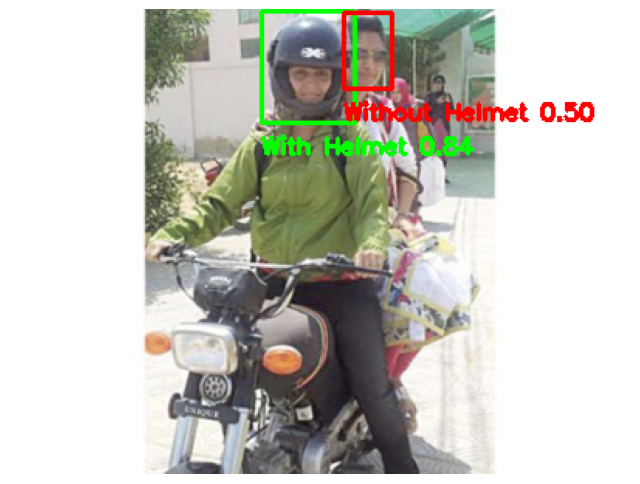

In [ ]:
import cv2
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Path to your images folder
images_folder = "/content/drive/MyDrive/Project/Dataset/helmet_data/images/val"

# Randomly select 1 image
all_images = [os.path.join(images_folder, f) for f in os.listdir(images_folder)
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
selected_images = random.sample(all_images, 1)

# Load trained model
model = YOLO("/content/drive/MyDrive/Project/Trained_Models/best_helmet_model_YOLOv8n.pt")

# Loop through selected images
for img_path in selected_images:
    # Run prediction
    results = model.predict(img_path, conf=0.5)

    # Load image
    img = cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB)

    # Loop through detections
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])

        # Choose color based on class
        color = (255, 0, 0) if cls == 0 else (0, 255, 0)

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

        # Put label below the bounding box
        label = f"{results[0].names[cls]} {conf:.2f}"
        label_y = y2 + 20  # 20 pixels below the bottom of the box
        cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show image
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
